In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pprint import pprint        

from jieba_postag_converter import get_postag_dict

In [2]:
def rank_by_unalighed_diff_counts_btw_methods(df,corpus='cejc',situation='apology',sen_type='query', relation='inferior', reverse=False):
    # FOR creating words ranking graph and pos rangling graph
    cols = {'primitive form':'word count', 'pos':'pos count'}
    for label_col, data_col in cols.items():
        df[data_col] = df.groupby(['corpus', 'situation', 'method', 'sentence type', 'difference type','upper relation',label_col])['index'].transform('count')
        df_word = df.drop_duplicates(['corpus', 'situation', 'method', 'sentence type', 'difference type','upper relation',label_col]).sort_values(by=data_col, ascending=False)
        df_word = df_word.dropna(subset=[label_col])

        # GET data for 1 graph
        difference_type = ['del','add']
        method_type = ['translated','rewrited']
        data, labels = [], []
        for diff_type in difference_type:
            _temp_w, _temp_wv = [], [] 
            for method in method_type:
                _temp_w.append(df_word[(df_word['corpus']==corpus)&(df_word['situation']==situation)&(df_word['method']==method)&(df_word['sentence type']==sen_type)&(df_word['difference type']==diff_type)&(df_word['upper relation']==relation)][label_col])
                _temp_wv.append(df_word[(df_word['corpus']==corpus)&(df_word['situation']==situation)&(df_word['method']==method)&(df_word['sentence type']==sen_type)&(df_word['difference type']==diff_type)&(df_word['upper relation']==relation)][data_col])
            # PUT data into dictionary, COUNT freq., CALCULATE (rewrited - translated) and SORT them
            dic = {}
            for i,(wline,vline) in enumerate(zip(_temp_w,_temp_wv)):
                for j,(w,v) in enumerate(zip(wline,vline)):
                    if w in dic:
                        dic[w]['each'][i]=v
                        v = v*-1 if i==0 else v
                        dic[w]['diff']=dic.get(w,dic.get('diff',0))['diff']+v
                    else:
                        tmp = [0,0]
                        tmp[i] = v
                        v = v*-1 if i==0 else v
                        dic.setdefault(w,{'each':tmp,'diff':v})
            dic = sorted(dic.items(),key=lambda x:x[1]['diff'],reverse=True)
            # pprint(dic)
            # exit()
            data_w, data_wv = [],[[],[]]
            for key, values in dic:
                data_w.append(key)
                data_wv[0].append(values['each'][0])
                data_wv[1].append(values['each'][1]) 
            labels.append(data_w)
            data.append(data_wv)
        
        # CREATE GRAPH
        ncol=1
        nrow=2
        width = 0.15
        max_n_x = 100
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.sans-serif'] = ['SimHei']
        fig = plt.figure(figsize=(25,8))
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        for i, d in enumerate(data):    
            d = np.array(d)
            n_x = max_n_x if d.shape[1]>=max_n_x else d.shape[1]
            left = np.arange(n_x)
            # SHARE the range of y-axis
            if i>=1:
                ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol),sharey=prev_ax)
            else:
                ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol))
            ax.set_ylim(0,50)
            
            # CONVERT pos tag labels
            try:
                pos_dic = get_postag_dict()
#                 labels[i] = [pos_dic[l[0]] for l in labels[i]] # Upper category
                labels[i] = [pos_dic[l] for l in labels[i]]
            except KeyError as e:
#                 print(e)
#                 print(labels[i][0])
                pass

            if reverse == True:
                plt.bar(left,           d[0][-n_x:],   width=width, align='center',label='translated')
                plt.bar(left+width,     d[1][-n_x:],   width=width, align='center',label='rewrited')
                plt.xticks(left+width/2, labels[i][-n_x:],rotation=45,fontsize='small')
            else:
                plt.bar(left,           d[0][:n_x],   width=width, align='center',label='translated')
                plt.bar(left+width,     d[1][:n_x],   width=width, align='center',label='rewrited')
                plt.xticks(left+width/2, labels[i][:n_x],rotation=45,fontsize='xx-small')
            title = "Diff_ranking"+" "+corpus+" "+situation+" "+sen_type+" "+difference_type[i]+" "+data_col
            plt.title(title, fontsize='x-large')
            ax.legend(fontsize='large')
            prev_ax = ax 

        fig.suptitle(f'unaligned {label_col} diff-ranking: {corpus} {situation} {sen_type}', fontsize=25)
        save_path = f"graph/diff_{label_col}_ranking_{corpus}_{situation}_{sen_type}.png"
        plt.show()
#         plt.savefig(save_path)
#         plt.close(fig) 
    return 0


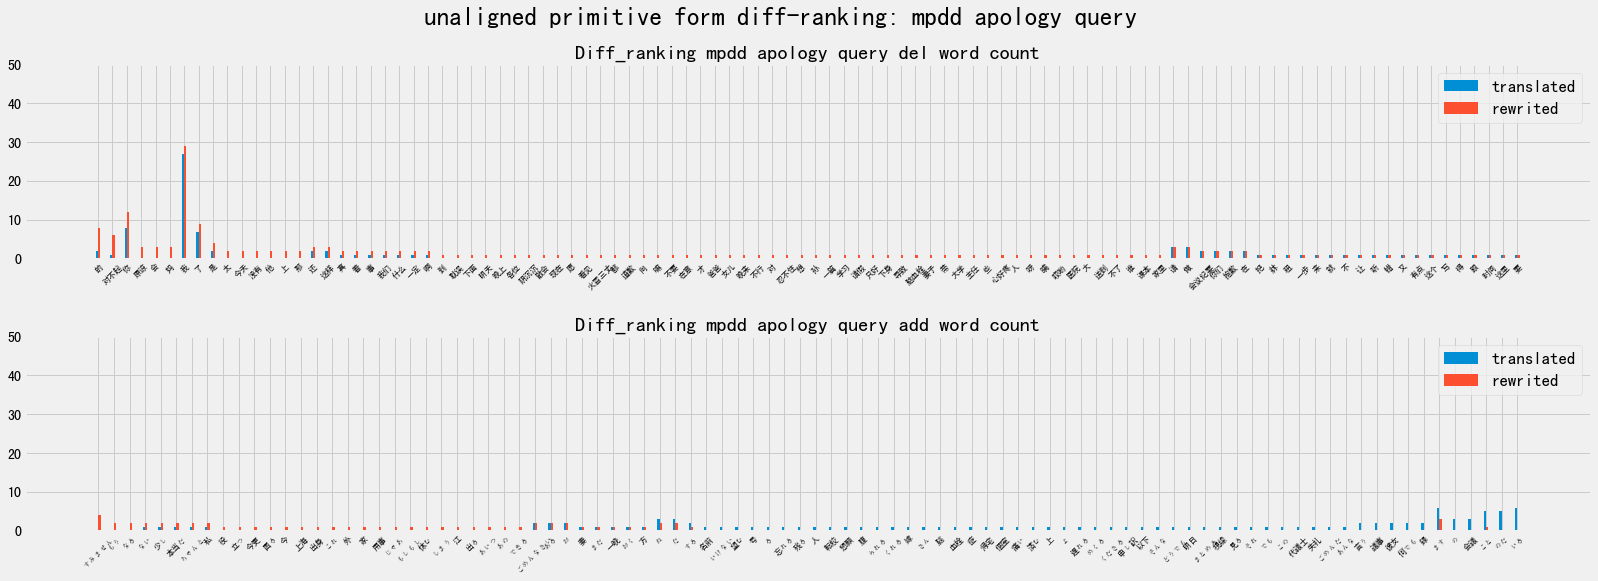

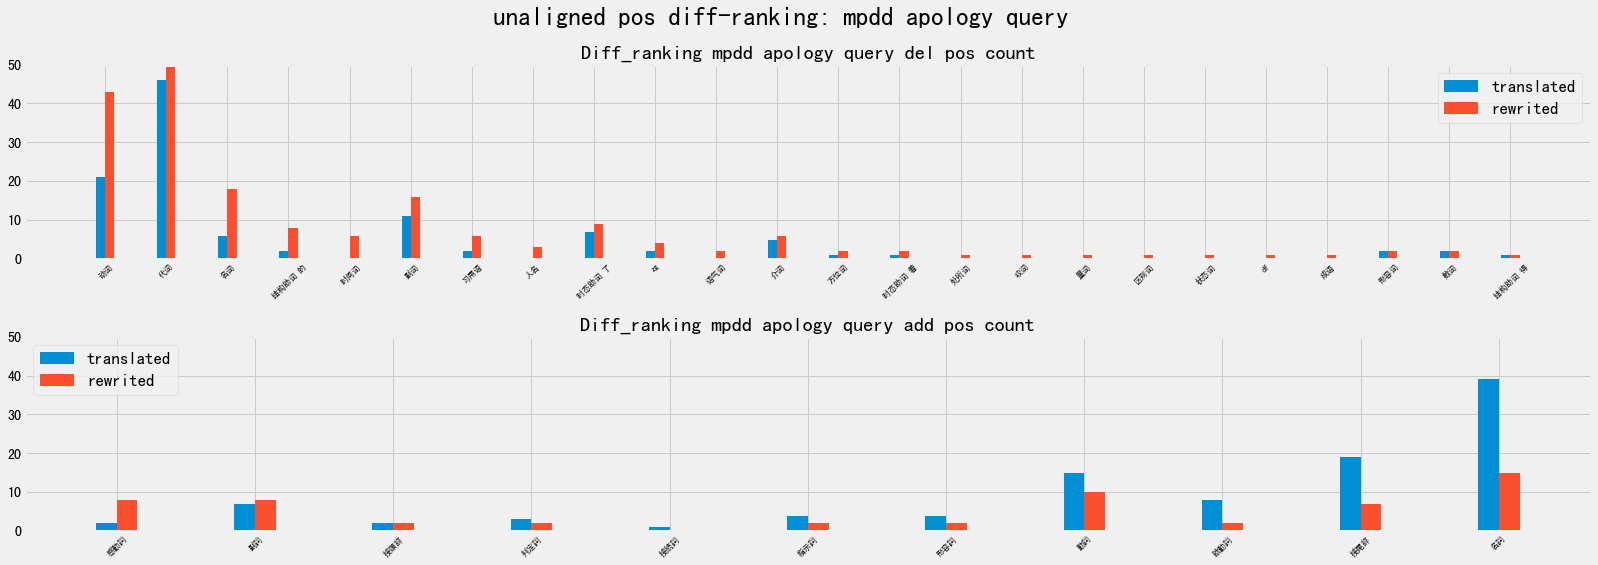

0

In [12]:
t_path = "analysis_table.csv"
df = pd.read_csv(t_path)

corpus = 'mpdd'
situation = 'apology'
sen_type = 'query'
relation = 'inferior'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)

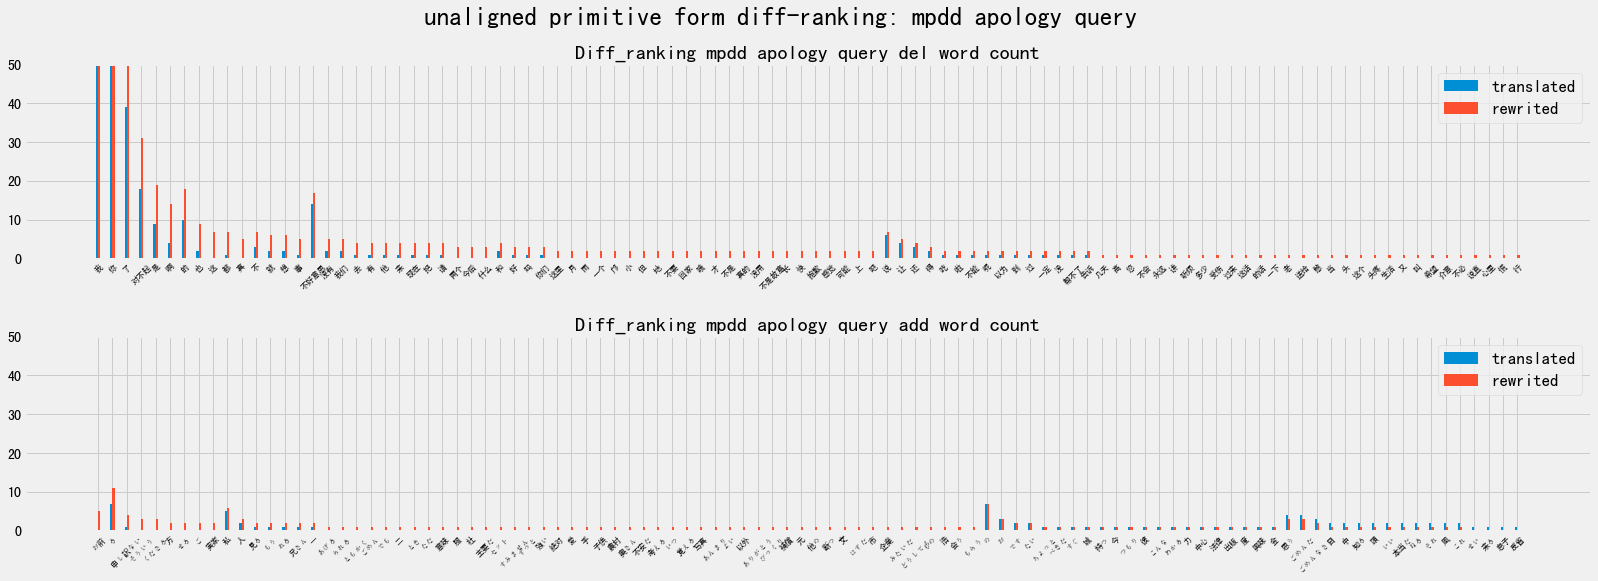

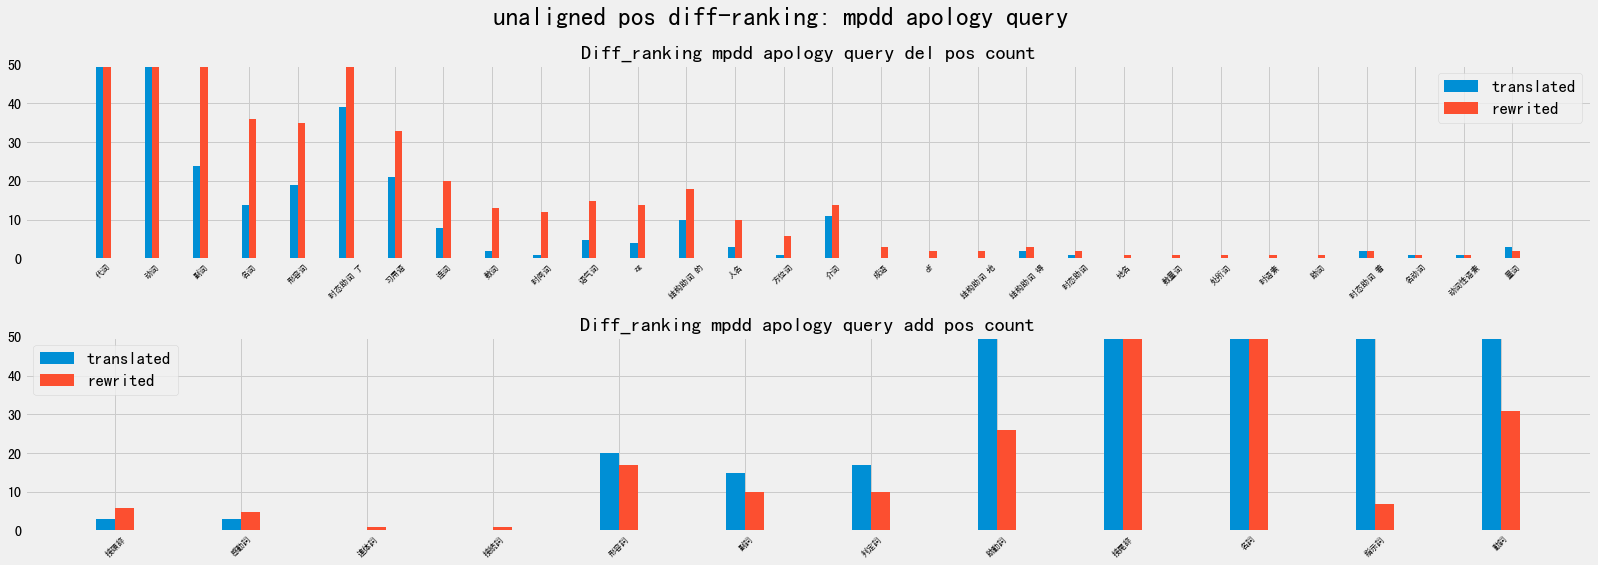

0

In [5]:
corpus = 'mpdd'
situation = 'apology'
sen_type = 'query'
relation = 'peer'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)

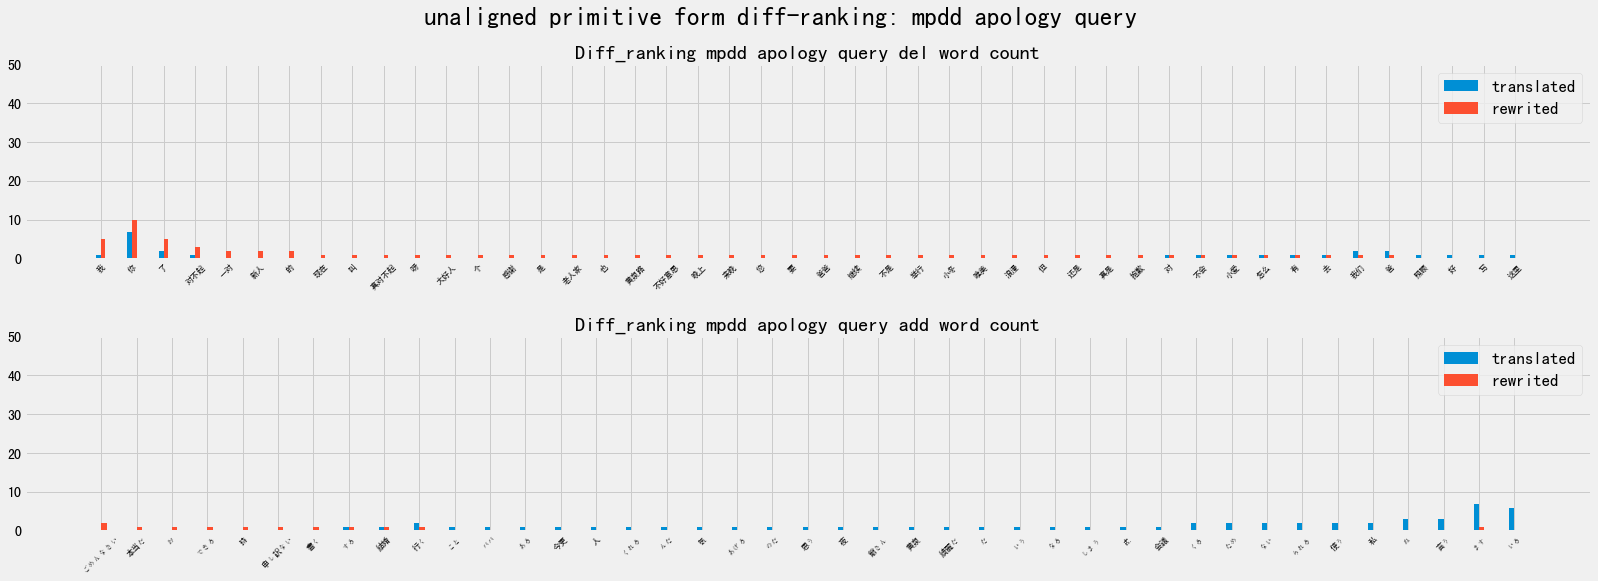

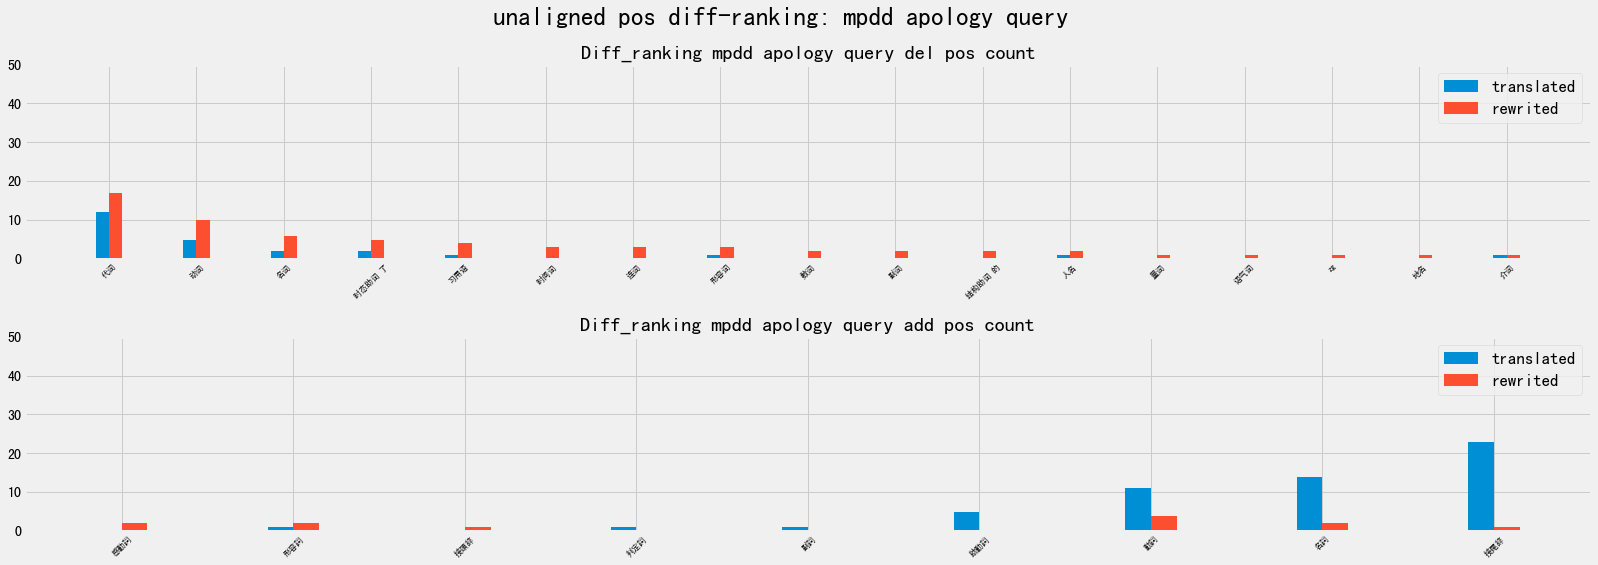

0

In [6]:
corpus = 'mpdd'
situation = 'apology'
sen_type = 'query'
relation = 'superior'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)

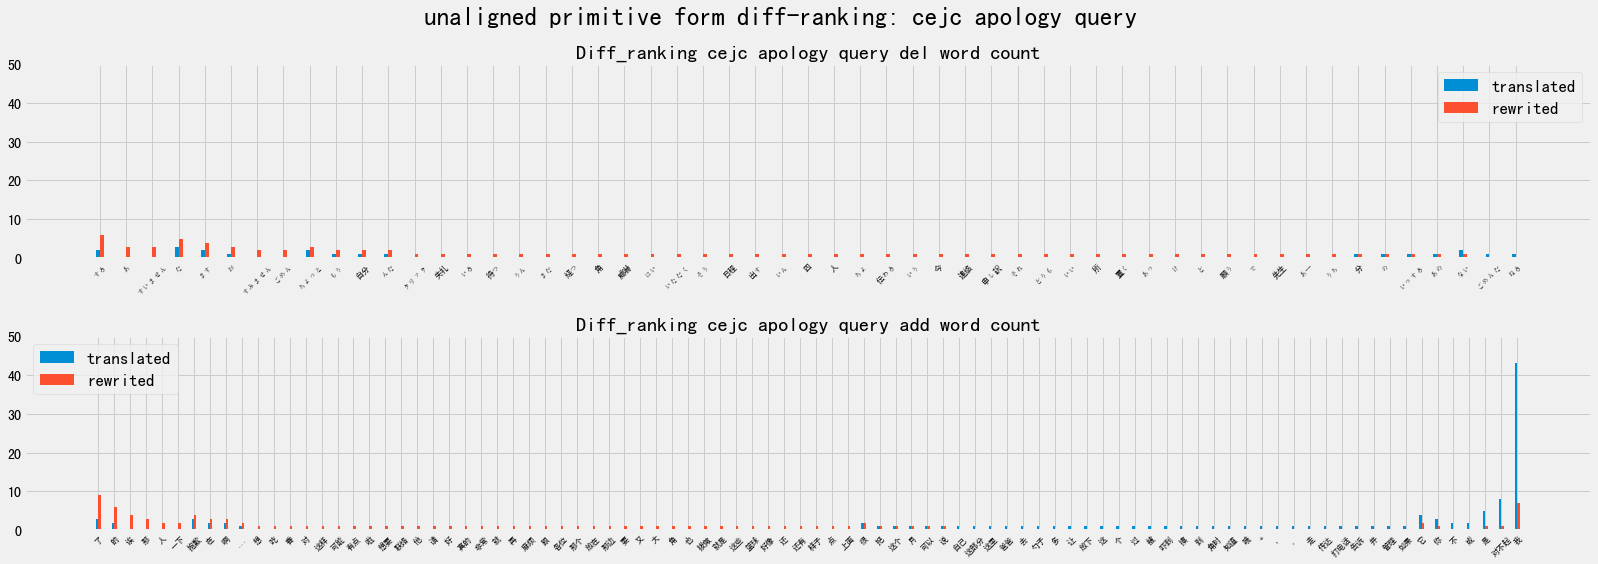

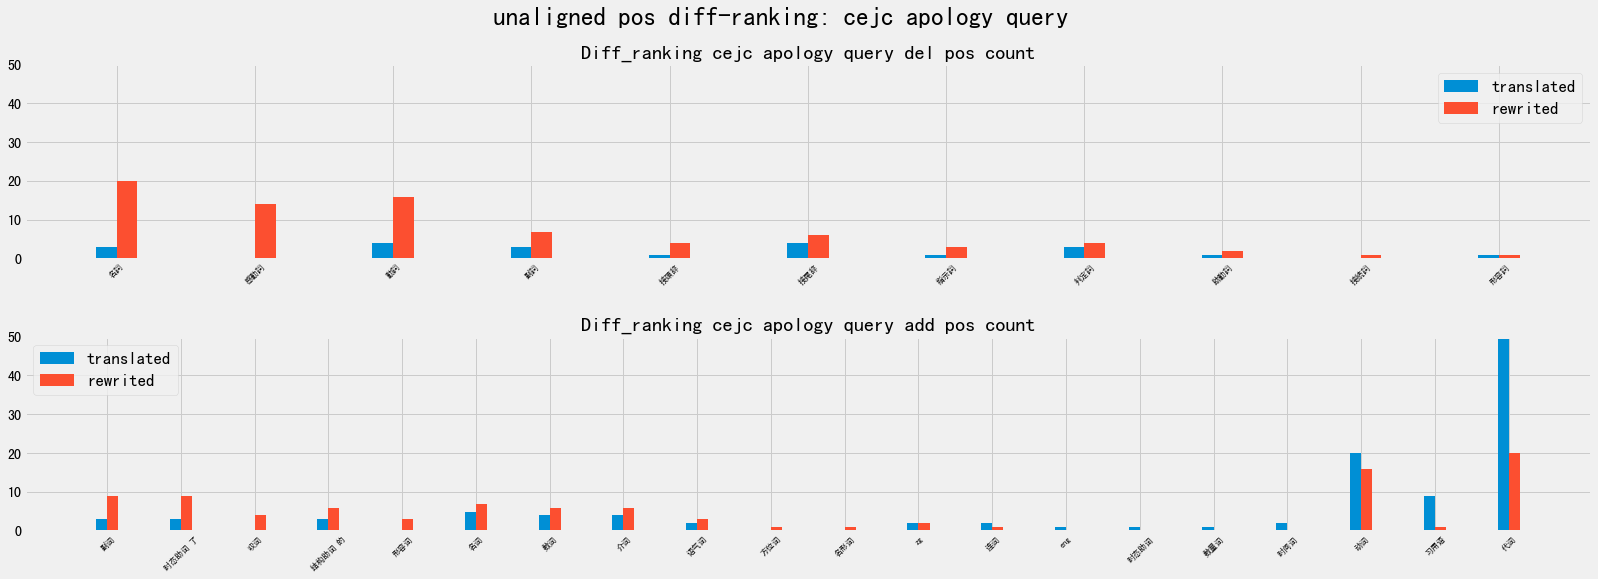

0

In [7]:
corpus = 'cejc'
situation = 'apology'
sen_type = 'query'
relation = 'inferior'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)

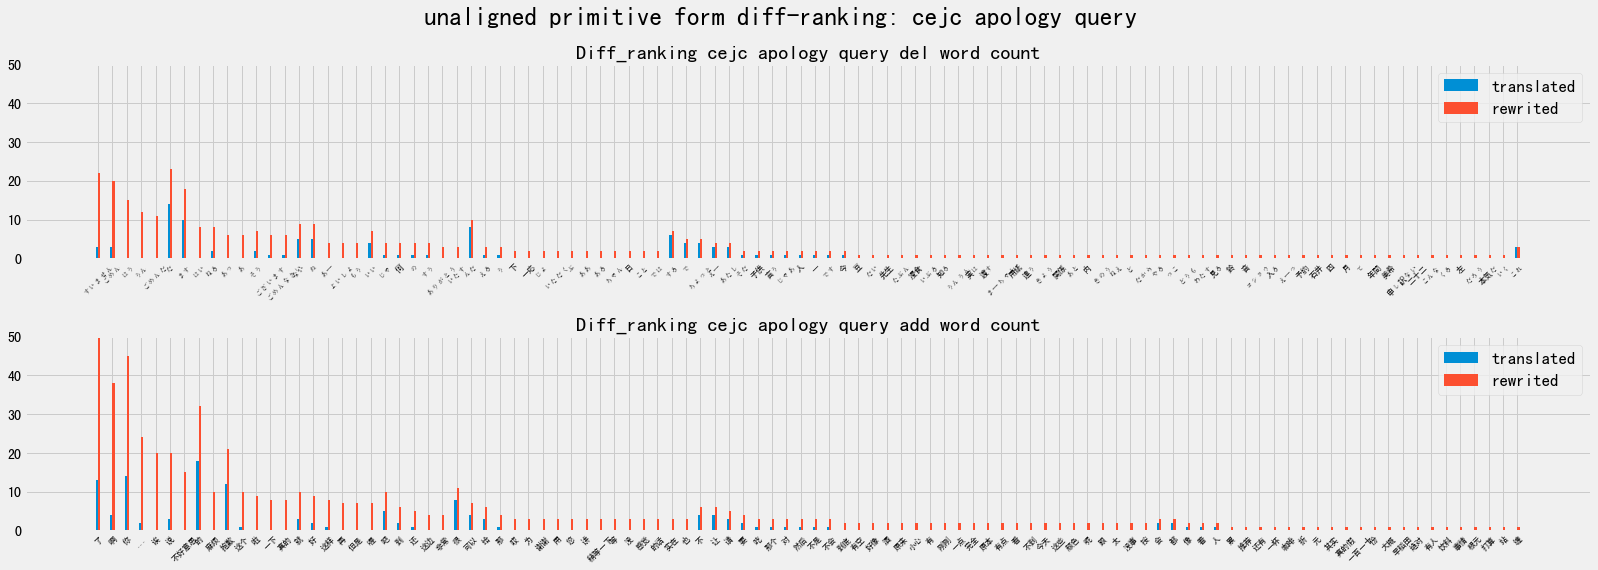

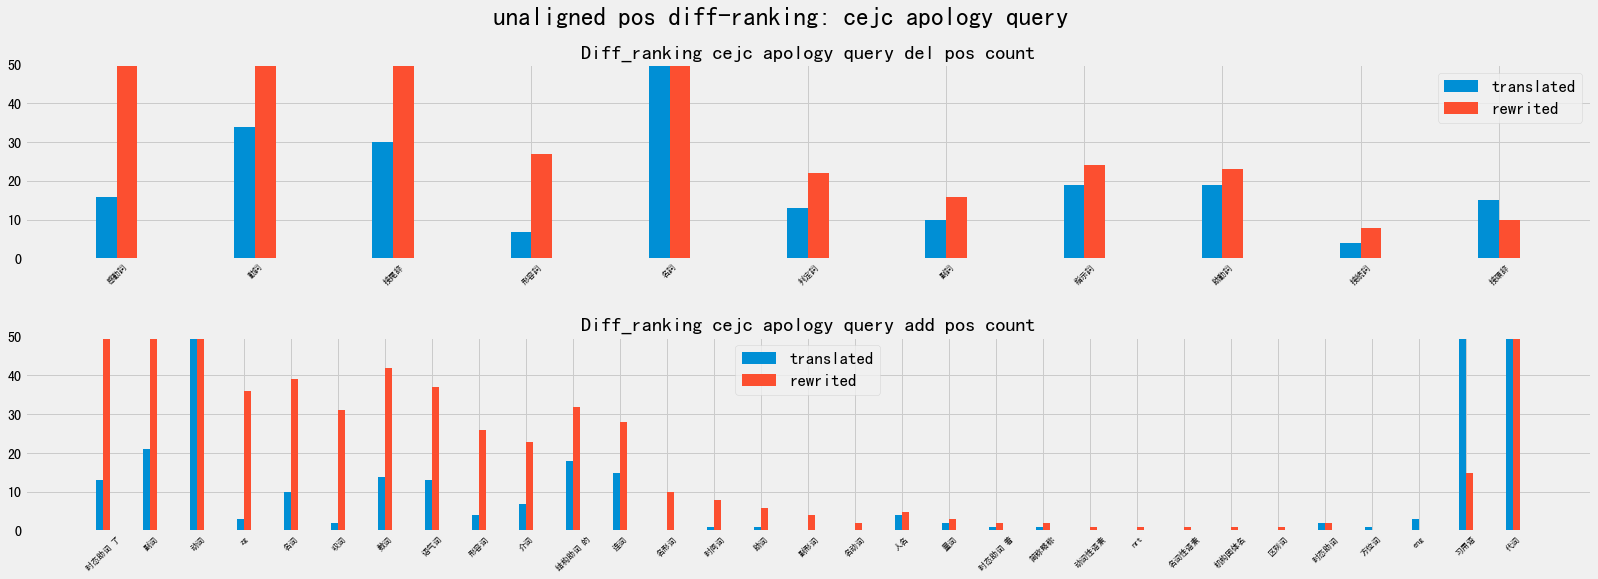

0

In [8]:
corpus = 'cejc'
situation = 'apology'
sen_type = 'query'
relation = 'peer'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)

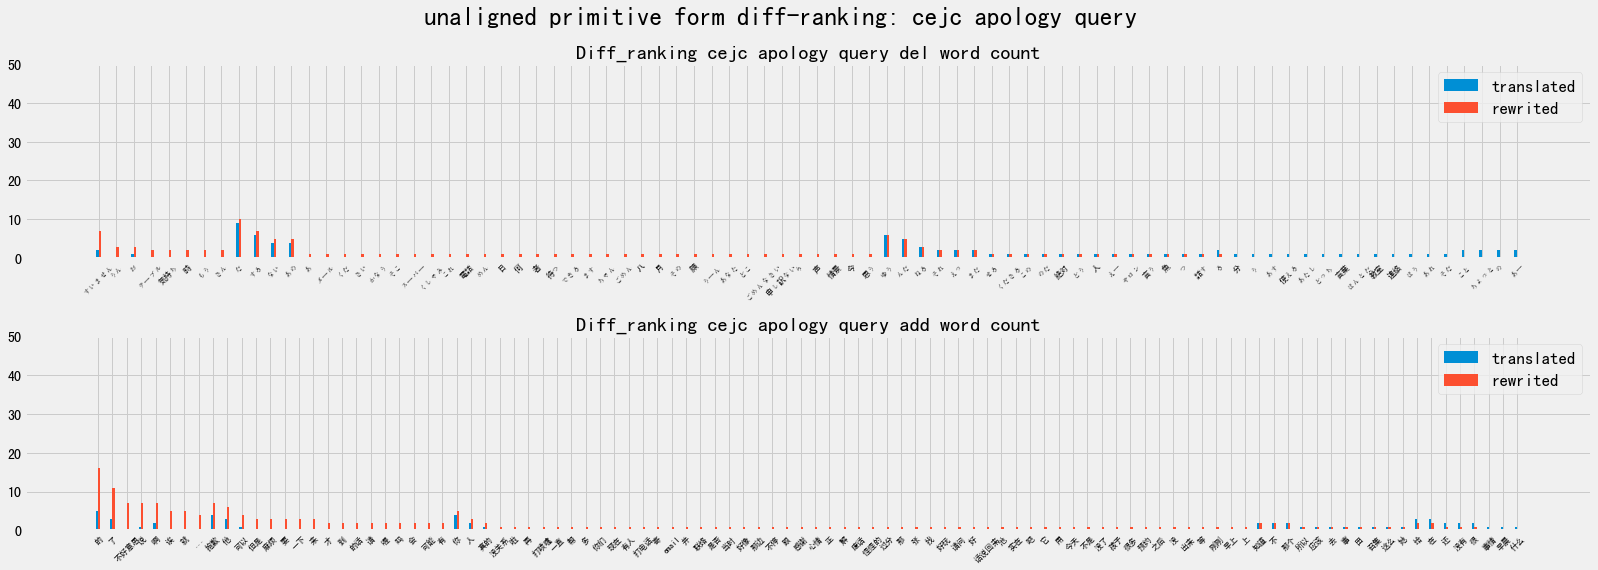

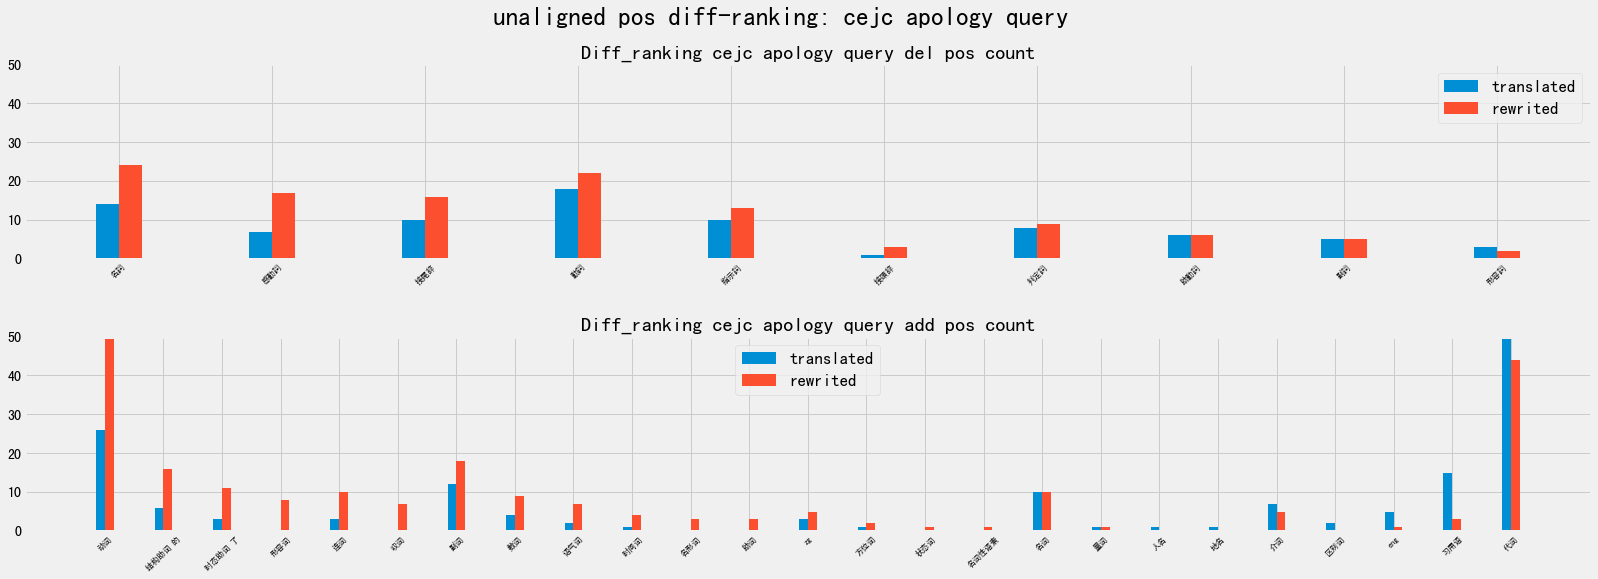

0

In [9]:
corpus = 'cejc'
situation = 'apology'
sen_type = 'query'
relation = 'superior'
rank_by_unalighed_diff_counts_btw_methods(df,corpus,situation,sen_type,relation)